In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import nltk
import re

In [2]:
df = pd.read_excel('scientific_subtopic_comments_p_fear.xlsx') 
df.head()

,Unnamed: 0,Unnamed: 0.1,id,page_id,post_id,post_message,post_caption,post_description,post_creation_time,post_time_original,...,sentiment_score,emotion_category,sentiment_category,page_name,post_combined,processed_content,is_vaccin,is_sinopharm,is_govt,is_viral vector
0,380,429,251085,129000000000,129011692114_10157537181867115,SIA said it is readying its Boeing 747-400 fre...,SIA to prioritise airfreight capacity for Covi...,"It is readying its Boeing 747-400 freighters, ...",1607104979,2020-12-04 18:02:00,...,-1,fear,negative,TheStraitsTimes,SIA to prioritise airfreight capacity for Covi...,"['sia', to', prioritise', airfreight', capacit...",True,True,False,True
1,392,441,251085,129000000000,129011692114_10157537181867115,SIA said it is readying its Boeing 747-400 fre...,SIA to prioritise airfreight capacity for Covi...,"It is readying its Boeing 747-400 freighters, ...",1607104979,2020-12-04 18:02:00,...,-1,fear,negative,TheStraitsTimes,SIA to prioritise airfreight capacity for Covi...,"['sia', to', prioritise', airfreight', capacit...",True,True,False,True
2,393,442,251085,129000000000,129011692114_10157537181867115,SIA said it is readying its Boeing 747-400 fre...,SIA to prioritise airfreight capacity for Covi...,"It is readying its Boeing 747-400 freighters, ...",1607104979,2020-12-04 18:02:00,...,-1,fear,negative,TheStraitsTimes,SIA to prioritise airfreight capacity for Covi...,"['sia', to', prioritise', airfreight', capacit...",True,True,False,True
3,398,447,251085,129000000000,129011692114_10157537181867115,SIA said it is readying its Boeing 747-400 fre...,SIA to prioritise airfreight capacity for Covi...,"It is readying its Boeing 747-400 freighters, ...",1607104979,2020-12-04 18:02:00,...,-1,fear,negative,TheStraitsTimes,SIA to prioritise airfreight capacity for Covi...,"['sia', to', prioritise', airfreight', capacit...",True,True,False,True
4,400,449,251085,129000000000,129011692114_10157537181867115,SIA said it is readying its Boeing 747-400 fre...,SIA to prioritise airfreight capacity for Covi...,"It is readying its Boeing 747-400 freighters, ...",1607104979,2020-12-04 18:02:00,...,-1,fear,negative,TheStraitsTimes,SIA to prioritise airfreight capacity for Covi...,"['sia', to', prioritise', airfreight', capacit...",True,True,False,True


In [20]:
df["content"].fillna(" ", inplace = True)
df["full_content"] = df["title"].astype(str) + " " + df["content"].astype(str)

In [21]:
df.head()

,Unnamed: 0,author,date,content,score,title,Anger,Fear,Sadness,Joy,...,url,upvote_ratio,date_unix,caption,source,emotion,emotion_intensity,sentiment,singapore,full_content
0,0,CATeach878,2020-01-02 16:29:33,"Yes, you, single parents. You too the ""I can't...",16967,"You Shouldn't Send Your Sick Kid to School, No...",0.536,0.469,0.530,0.167,...,https://www.reddit.com/r/TrueOffMyChest/commen...,0.86,1577953773,None,reddit,anger,moderate,negative,False,"You Shouldn't Send Your Sick Kid to School, No..."
1,1,ismokefagsitsnotgay,2020-01-04 20:53:56,,82,Wuhan pneumonia - first suspect case identifie...,0.368,0.599,0.465,0.254,...,https://www.reddit.com/r/singapore/comments/ej...,0.94,1578142436,News,reddit,fear,moderate,negative,True,Wuhan pneumonia - first suspect case identifie...
2,2,monstermayhem436,2020-01-05 16:29:13,2020 can go suck a dick\n\nEdit: Volcano has e...,36609,2020 has started off great. Australia is burni...,0.616,0.693,0.573,0.280,...,https://www.reddit.com/r/teenagers/comments/ek...,0.83,1578212953,Rant,reddit,fear,high,negative,False,2020 has started off great. Australia is burni...
3,3,jhmelvin,2020-01-05 22:00:43,,16,MOE: Chinese girl with pneumonia not linked to...,0.368,0.565,0.391,0.261,...,https://www.reddit.com/r/singapore/comments/ek...,0.79,1578232843,News,reddit,fear,moderate,negative,True,MOE: Chinese girl with pneumonia not linked to...
4,4,FallStudiosMC,2020-01-06 19:06:44,,3473,"A short cinematic of our ""City of Corona"" plot...",0.332,0.400,0.336,0.352,...,https://www.reddit.com/r/Minecraft/comments/ek...,0.99,1578308804,None,reddit,joy,low,positive,False,"A short cinematic of our ""City of Corona"" plot..."


In [52]:
def calculate_emotion_term(row):
    if row['Valence'] >= 0.52:
        val = 'joy'
    elif row['Anger'] > row['Sadness'] and row['Anger'] > row['Fear']:
        val = 'anger'
    elif row['Sadness'] > row['Anger'] and row['Sadness'] > row['Fear']:
        val = 'sadness'
    elif row['Fear'] > row['Anger']:
        val = 'fear'
    else:
        val = 'none'
    return val

def calculate_sentiment_term(row):
    if row['Valence'] <= 0.25:
        val = 'very negative'
    elif row['Valence'] <= 0.48:
        val = 'negative'
    elif row['Valence'] <= 0.52:
        val = 'neutral'        
    elif row['Valence'] <= 0.75:
        val = 'positive'
    else:
        val = 'very positive'
    return val

def is_singapore(row):
    return "r/singapore" in row["url"]
def calculate_intensity_term(row):
    if row['emotion_intensity'] < 0.4:
            val = 'low'
    if row['emotion_intensity'] < 0.6:
            val = 'moderate'
    if row['emotion_intensity'] < 0.8:
            val = 'high'
    else:
        val = 'very high'
    return val

In [55]:
df['emotion'] = df.apply(calculate_emotion_term, axis=1)
df['intensity'] = df.apply(calculate_intensity_term, axis = 1)
df['sentiment'] = df.apply(calculate_sentiment_term, axis=1)
df['singapore'] = df.apply(is_singapore, axis=1)

In [63]:
df.head()

,Unnamed: 0.1,Unnamed: 0,author,date,content,score,title,Anger,Fear,Sadness,...,url,upvote_ratio,date_unix,caption,source,emotion,emotion_intensity,sentiment,singapore,intensity
0,0,0,trashyfam,2020-01-24 12:11:59,NaN,144,Wuhan virus: Singaporean escapes Wuhan hours b...,0.480,0.622,0.506,...,https://www.reddit.com/r/singapore/comments/et...,0.95,1579839119,News,reddit,fear,0.622,negative,True,very high
1,1,1,shkreli4prez2020,2020-02-01 09:02:12,NaN,0,Logistical and technical analysis of the origi...,0.355,0.487,0.374,...,https://www.reddit.com/r/novel_coronavirus/com...,0.50,1580518932,None,reddit,fear,0.487,negative,False,very high
2,2,2,prallundfeucht,2020-02-03 17:32:16,"when you need stuff, then N95 masks will be pr...",0,Capitalism makes everything cheaper and more e...,0.397,0.353,0.413,...,https://www.reddit.com/r/Libertarian/comments/...,0.29,1580722336,Discussion,reddit,sadness,0.413,negative,False,very high
3,3,3,EnglishShady,2020-01-27 06:38:52,NaN,19026,I used the Corona to destroy the Corona,0.460,0.415,0.414,...,https://www.reddit.com/r/dank_meme/comments/eu...,0.96,1580078332,None,reddit,anger,0.460,negative,False,very high
4,4,4,Jammy_buttons2,2020-02-03 07:53:05,NaN,5,"Safeguarding jobs, businesses primary focus in...",0.330,0.507,0.384,...,https://www.reddit.com/r/singapore/comments/ex...,0.73,1580687585,News,reddit,fear,0.507,neutral,True,very high


In [22]:
df.to_excel("reddit_posts_ALL_till_31MAR_latesttt.xlsx")

In [6]:
def wordcloud_generator(frame, col):
    comment_words = ' '
    stopwords = set(STOPWORDS)
    
 
    # iterate through the csv file 
    for val in frame[col]:      
        # typecaste each val to string 
        val = str(val)   
    #     # split the value 
    #     tokens = val.split()  
    #     # Converts each token into lowercase
    #     for i in range(len(tokens)):
    #         tokens[i] = tokens[i].lower() 
        val = val.lower()
        pattern = r'[^a-zA-Z0-9\s]'   
        re.sub(pattern, '', val)
        tokens = nltk.word_tokenize(val)    
        tokens = [token.strip() for token in tokens]
        for token in tokens:
            comment_words = comment_words + token

    wordcloud = WordCloud(width=800, height=800, stopwords = stopwords, background_color="white", min_font_size=10).generate(comment_words)

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [8]:
text = " ".join(review for review in df.entry_text)

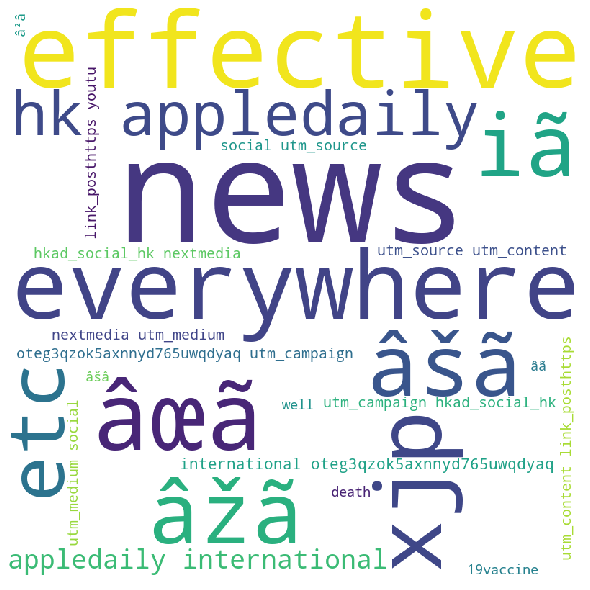

In [12]:
wordcloud_generator(df, 'entry_text')

In [ ]:
df.to_excel("virus_posts_emotions_analyzed.xlsx")

In [35]:
df2 = pd.read_excel("virus_comments.xlsx")
df2.head()

,Column1,date,comment,Anger,Fear,Sadness,Joy,Valence,score,is_submitter,author,comment_id,submission_id,Keep,url
0,0,2020-01-22 04:28:31,I love happy endings,0.071,0.036,0.105,0.822,0.788,6,0,extraspaghettisauce,ff7086w,ervx9r,Keep,https://www.reddit.com/r/todayilearned/comment...
1,1,2020-01-31 21:34:41,Do we know how long the virus remains viable/s...,0.521,0.558,0.506,0.114,0.278,5,0,djscoox,fg3c9ry,ewll5h,Keep,https://www.reddit.com/r/China_Flu/comments/ew...
2,2,2020-02-01 10:50:42,Whelp its been fun .,0.258,0.251,0.255,0.485,0.679,2,0,Keroseneskyz,fg5ens1,ewqgcv,Keep,https://www.reddit.com/r/conspiracy/comments/e...
3,3,2020-01-31 08:04:47,So then why is everyone in China wearing goggl...,0.457,0.421,0.399,0.221,0.358,10,0,StargazerTaylor,fg1l6uj,ewebqz,Keep,https://www.reddit.com/r/China_Flu/comments/ew...
4,4,2020-01-31 23:49:42,"The Government is who let the virus out, so no...",0.518,0.437,0.435,0.179,0.378,1,0,uniqueusor,fg3nqn7,ewikgd,Keep,https://www.reddit.com/r/HongKong/comments/ewi...


In [47]:
df2['emotion'] = df2.apply(calculate_emotion_term, axis=1)
df2['sentiment'] = df2.apply(calculate_sentiment_term, axis=1)
df2['singapore'] = df2.apply(is_singapore, axis=1)
#df2.loc[:, ["Column1","Joy", "Fear", "Sadness", "Anger", "Valence", "emotion", "sentiment", "singapore"]]
df2.drop(columns=["Keep"])
df2.tail()

,Column1,date,comment,Anger,Fear,Sadness,Joy,Valence,score,is_submitter,author,comment_id,submission_id,Keep,url,emotion,sentiment,singapore
17738,19481,2020-01-24 18:13:52,Wait ... Does that fountain spit out Corona??,0.412,0.394,0.332,0.329,0.412,1,0,Celorblas1,ffeqqxr,et2y2n,Keep,https://www.reddit.com/r/fakehistoryporn/comme...,anger,negative,False
17739,19482,2020-01-31 16:37:02,Carousell has a few. Some are giving them out ...,0.378,0.269,0.341,0.392,0.554,1,0,Rusalochke,fg2x6bb,ewkl3n,Keep,https://www.reddit.com/r/singapore/comments/ew...,joy,positive,True
17740,19483,2020-01-25 00:02:06,"This is the best tl;dr I could make, [original...",0.399,0.407,0.325,0.333,0.489,7,0,autotldr,fffdr8j,etc3uj,Keep,https://www.reddit.com/r/worldnews/comments/et...,fear,neutral,False
17741,19484,2020-01-27 05:44:11,"Doesn't care about getting pneumonia, but she'...",0.472,0.465,0.432,0.315,0.412,1,0,feor1300,ffo84b1,eu9io3,Keep,https://www.reddit.com/r/funny/comments/eu9io3...,anger,negative,False
17742,19485,2020-01-30 02:01:02,Can I get some SARS blankets to go with it?,0.272,0.341,0.303,0.298,0.463,2,0,karma_virus,ffxa0u4,evm1sq,Keep,https://www.reddit.com/r/memes/comments/evm1sq...,fear,negative,False


In [ ]:
def wordcloud_generator_from_cells(frame, col):
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in frame[col]:      
        # typecaste each val to string 
        val = str(val)   
    #     # split the value 
    #     tokens = val.split()  
    #     # Converts each token into lowercase
    #     for i in range(len(tokens)):
    #         tokens[i] = tokens[i].lower() 
        val = val.lower()
        pattern = r'[^a-zA-Z0-9\s]'   
        re.sub(pattern, '', val)
        tokens = nltk.word_tokenize(val)    
        tokens = [token.strip() for token in tokens]
        for token in tokens:
            comment_words = comment_words + token

    wordcloud = WordCloud(width=800, height=800, stopwords = stopwords, background_color="white", min_font_size=10).generate(comment_words)

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

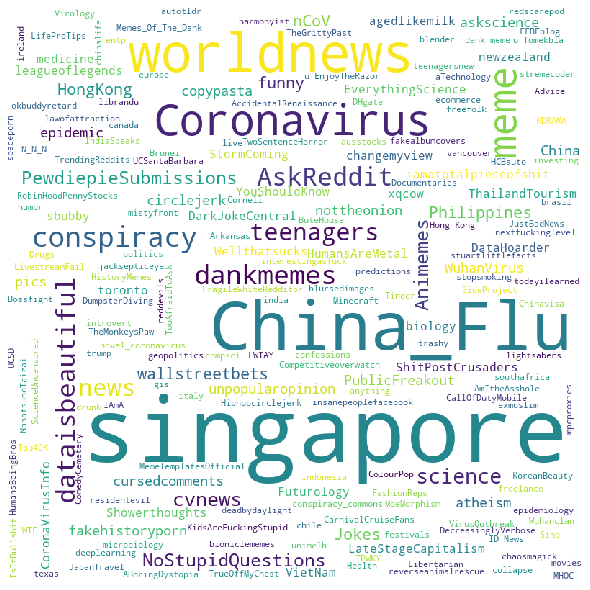

In [146]:
#wordcloud_generator(df2, "comment")
def extract_subreddits(df):
        #print(url)
    result = re.search('www.reddit.com/r/(.*)/comments', df["url"])
    return result.group(1)
        
df['subreddit'] = df.apply(extract_subreddits, axis=1)
comment_words = ' '
stopwords = set(STOPWORDS)
subs = df['subreddit'].tolist()
for sub in subs:
    comment_words = comment_words + sub + " "
wordcloud = WordCloud(width=800, height=800, stopwords = stopwords, background_color="white", min_font_size=10).generate(comment_words)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [45]:
df2.to_excel("virus_comments_emotions_analyzed.xlsx")

In [76]:
def calculate_emotion_term_comments(row):
    if row['Valence_x'] >= 0.52:
        val = 'joy'
    elif row['Anger_x'] > row['Sadness_x'] and row['Anger_x'] > row['Fear_x']:
        val = 'anger'
    elif row['Sadness_x'] > row['Anger_x'] and row['Sadness_x'] > row['Fear_x']:
        val = 'sadness'
    elif row['Fear_x'] > row['Anger_x']:
        val = 'fear'
    else:
        val = 'none'
    return val

def calculate_sentiment_term_comments(row):
    if row['Valence_x'] <= 0.25:
        val = 'very negative'
    elif row['Valence_x'] <= 0.48:
        val = 'negative'
    elif row['Valence_x'] <= 0.52:
        val = 'neutral'        
    elif row['Valence_x'] <= 0.75:
        val = 'positive'
    else:
        val = 'very positive'
    return val

def calculate_emotion_term_posts(row):
    if row['Valence_y'] >= 0.52:
        val = 'joy'
    elif row['Anger_y'] > row['Sadness_y'] and row['Anger_y'] > row['Fear_y']:
        val = 'anger'
    elif row['Sadness_y'] > row['Anger_y'] and row['Sadness_y'] > row['Fear_y']:
        val = 'sadness'
    elif row['Fear_y'] > row['Anger_y']:
        val = 'fear'
    else:
        val = 'none'
    return val

def calculate_sentiment_term_posts(row):
    if row['Valence_y'] <= 0.25:
        val = 'very negative'
    elif row['Valence_y'] <= 0.48:
        val = 'negative'
    elif row['Valence_y'] <= 0.52:
        val = 'neutral'        
    elif row['Valence_y'] <= 0.75:
        val = 'positive'
    else:
        val = 'very positive'
    return val

In [87]:
df3 = pd.merge(df2, df, how="left", on="submission_id", sort=False, validate="many_to_one")
# df3.loc[:, ["Column1_x", "submission_id", "emotion_x", "comment", "emotion_y", "title"]]
df3.loc[:, "submission_id"]
df4 = df3.groupby("submission_id").mean()
df4["sentiment_y"] = df4.apply(calculate_sentiment_term_posts, axis=1)
df4["emotion_y"] = df4.apply(calculate_emotion_term_posts, axis=1)
df4["sentiment_x"] = df4.apply(calculate_sentiment_term_comments, axis=1)
df4["emotion_x"] = df4.apply(calculate_emotion_term_comments, axis=1)
#df4.columns
#df4.loc[:, ["Valence_x", "Valence_y", "sentiment_x", "sentiment_y", "emotion_x", "emotion_y"]]

submission_id  submission_id
ejwba7         ejwba7            4
ekdcjc         ekdcjc            2
eksp6h         eksp6h           31
elwetf         elwetf           32
emr39l         emr39l            1
                                ..
eyi5ne         eyi5ne            4
eyi5vj         eyi5vj            2
eyi5zp         eyi5zp            3
eyi6zz         eyi6zz            3
eyi81f         eyi81f            1
Name: submission_id, Length: 711, dtype: int64

In [82]:
df4.columns

Index(['Column1_x', 'Anger_x', 'Fear_x', 'Sadness_x', 'Joy_x', 'Valence_x',
       'score_x', 'is_submitter', 'singapore_x', 'Column1_y', 'score_y',
       'Anger_y', 'Fear_y', 'Sadness_y', 'Joy_y', 'Valence_y', 'over_18',
       'upvote_ratio', 'date_unix', 'singapore_y', 'sentiment_y', 'emotion_y',
       'sentiment_x', 'emotion_x'],
      dtype='object')

In [89]:
counts = df3.groupby("submission_id")["title"].value_counts()
counts.to_excel("comments_per_post.xlsx")